In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('DataSet.csv')
df.head()

,Fasting,OGTT,Glycated,Diabetes
0,92,119,5.6,0
1,115,209,6.0,0
2,107,153,5.8,0
3,81,79,4.1,0
4,84,86,5.6,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6219 entries, 0 to 6218
Data columns (total 4 columns):
Fasting     6219 non-null int64
OGTT        6219 non-null int64
Glycated    6219 non-null float64
Diabetes    6219 non-null int64
dtypes: float64(1), int64(3)
memory usage: 194.4 KB


In [5]:
df.describe()

,Fasting,OGTT,Glycated,Diabetes
count,6219.000000,6219.000000,6219.000000,6219.000000
mean,93.864126,112.795144,5.157212,0.017849
std,15.815274,45.461776,0.723429,0.132411
min,64.000000,29.000000,3.000000,0.000000
25%,85.000000,87.000000,4.700000,0.000000
50%,91.000000,103.000000,5.100000,0.000000
75%,99.000000,124.000000,5.500000,0.000000
max,315.000000,473.000000,11.900000,1.000000


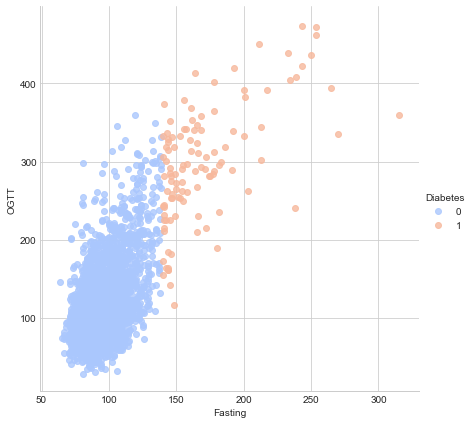

In [6]:
sns.set_style('whitegrid')
sns.lmplot('Fasting','OGTT',data=df, hue='Diabetes', fit_reg=False,palette='coolwarm',size=6,aspect=1)

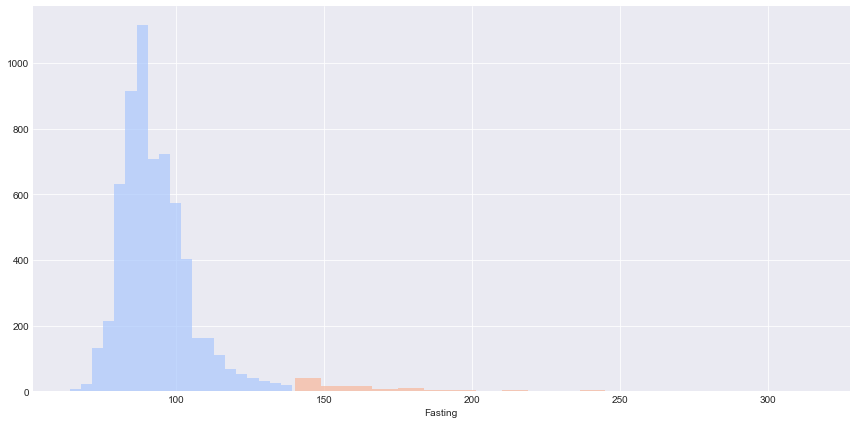

In [7]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Diabetes",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Fasting',bins=20,alpha=0.7)

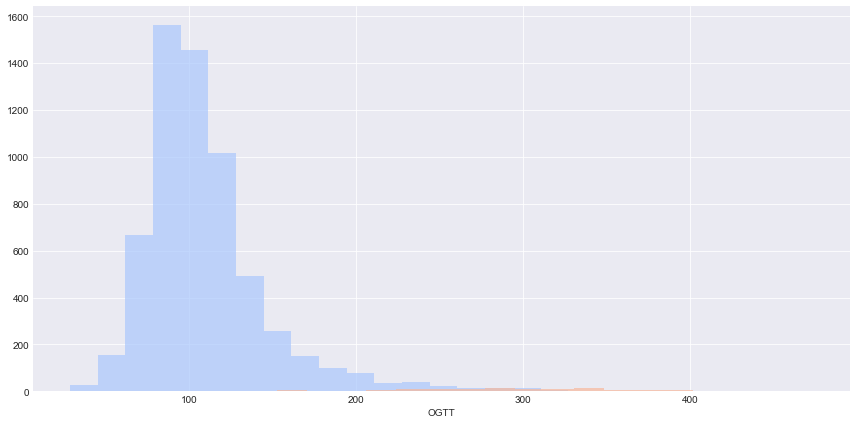

In [8]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Diabetes",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'OGTT',bins=20,alpha=0.7)

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(df.drop('Diabetes',axis=1))
kmeans.cluster_centers_

array([[ 91.24841772, 102.03902954,   5.08139944],
       [121.88323917, 228.01318267,   5.9693032 ]])

In [11]:
def converter(cluster):
    if cluster==1:
        return 1
    else:
        return 0

In [13]:
df['Cluster'] = df['Diabetes'].apply(converter)
df.head()

,Fasting,OGTT,Glycated,Diabetes,Cluster
0,92,119,5.6,0,0
1,115,209,6.0,0,0
2,107,153,5.8,0,0
3,81,79,4.1,0,0
4,84,86,5.6,0,0


In [14]:
from sklearn.metrics import confusion_matrix,classification_report
#print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

             precision    recall  f1-score   support

          0       1.00      0.93      0.96      6108
          1       0.20      0.97      0.34       111

avg / total       0.99      0.93      0.95      6219

